In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
df=pd.read_csv(r'C:\Users\DELL\Downloads\2015-building-energy-benchmarking.csv')
#predict the emissions of buildings whose emissions have not yet been measured.

In [3]:
#basic data analysis,quick view of data set
#showes first five rows of the data se
df.head()
#47 columns

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
#summary statistics
df.describe()


,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,...,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,...,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,...,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,...,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,...,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,...,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [7]:
# Inspect missing values in the dataset
print(df.isnull().values.sum())

26512


In [8]:
# Impute the missing values with mean imputation
df = df.fillna(df.mean())

In [9]:
print(df.isnull().values.sum())

14640


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [11]:
# Impute the missing values with mean imputation
df = df.fillna(df.mode())

In [12]:
print(df.isnull().values.sum())
#14623

14623


In [13]:
#sort the column
df=df.reindex(sorted(df.columns), axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   2010 Census Tracts                                             3340 non-null   float64
 1   BuildingType                                                   3340 non-null   object 
 2   City Council Districts                                         3340 non-null   float64
 3   Comment                                                        26 non-null     object 
 4   ComplianceStatus                                               3340 non-null   object 
 5   CouncilDistrictCode                                            3340 non-null   int64  
 6   DataYear                                                       3340 non-null   int64  
 7   DefaultData                                                 

In [15]:
#drop the columns which has lot of missing values
df.drop(['Comment' ,'Outlier','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','YearsENERGYSTARCertified','LargestPropertyUseType'],axis=1, inplace=True)

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 41 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   2010 Census Tracts                                             3340 non-null   float64
 1   BuildingType                                                   3340 non-null   object 
 2   City Council Districts                                         3340 non-null   float64
 3   ComplianceStatus                                               3340 non-null   object 
 4   CouncilDistrictCode                                            3340 non-null   int64  
 5   DataYear                                                       3340 non-null   int64  
 6   DefaultData                                                    3339 non-null   object 
 7   ENERGYSTARScore                                             

In [17]:
print(df.isnull().values.sum())
#14623

130


In [18]:
#To select  numeric types and object types
df_num=df.select_dtypes(np.number)
df_obj=df.select_dtypes('object')

In [19]:
df_num.info()
#32column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 32 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   2010 Census Tracts                                             3340 non-null   float64
 1   City Council Districts                                         3340 non-null   float64
 2   CouncilDistrictCode                                            3340 non-null   int64  
 3   DataYear                                                       3340 non-null   int64  
 4   ENERGYSTARScore                                                3340 non-null   float64
 5   Electricity(kBtu)                                              3340 non-null   float64
 6   Electricity(kWh)                                               3340 non-null   float64
 7   GHGEmissions(MetricTonsCO2e)                                

In [20]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   BuildingType                   3340 non-null   object
 1   ComplianceStatus               3340 non-null   object
 2   DefaultData                    3339 non-null   object
 3   ListOfAllPropertyUseTypes      3213 non-null   object
 4   Location                       3340 non-null   object
 5   Neighborhood                   3340 non-null   object
 6   PrimaryPropertyType            3340 non-null   object
 7   PropertyName                   3340 non-null   object
 8   TaxParcelIdentificationNumber  3338 non-null   object
dtypes: object(9)
memory usage: 235.0+ KB


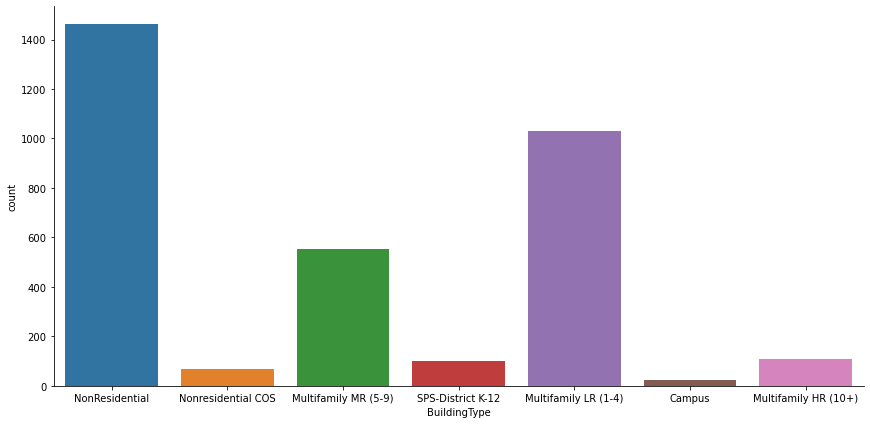

In [32]:
# seaborn histogram 
#plt.figure(figsize=(25,255))
sns.catplot(x="BuildingType", kind="count",height=6, aspect=2,data=df)
#Catplot Python Seaborn: One Function to Rule All Plots With Categorical Variables


In [ ]:
#NonResidentials buildings are higher in number

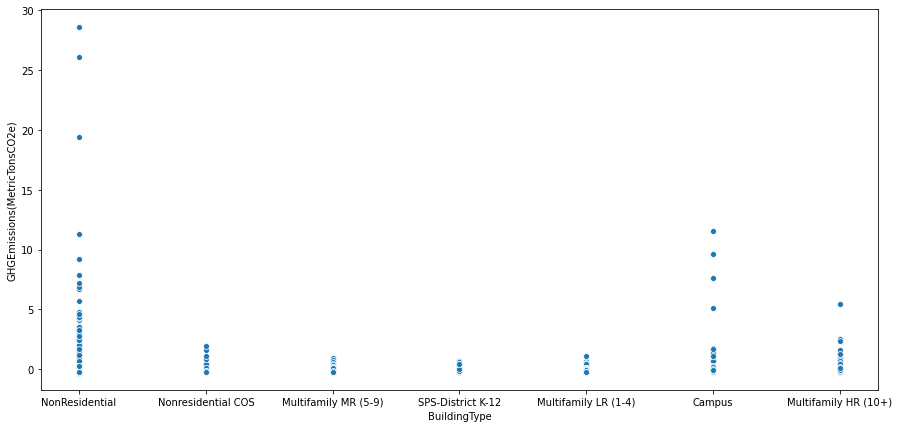

In [37]:
#seaborn Scatterplot
#(z-score )normalization is applied on "TotalGHGEmissions"
plt.figure(figsize=(15,7))
df["GHGEmissions(MetricTonsCO2e)"]=(df["GHGEmissions(MetricTonsCO2e)"]-df["GHGEmissions(MetricTonsCO2e)"].mean())/df["GHGEmissions(MetricTonsCO2e)"].std()
sns.scatterplot(x=df['BuildingType'], y=df['GHGEmissions(MetricTonsCO2e)'])
#NonResidentials buildings are higher in GHGEmissions(MetricTonsCO2e)
#

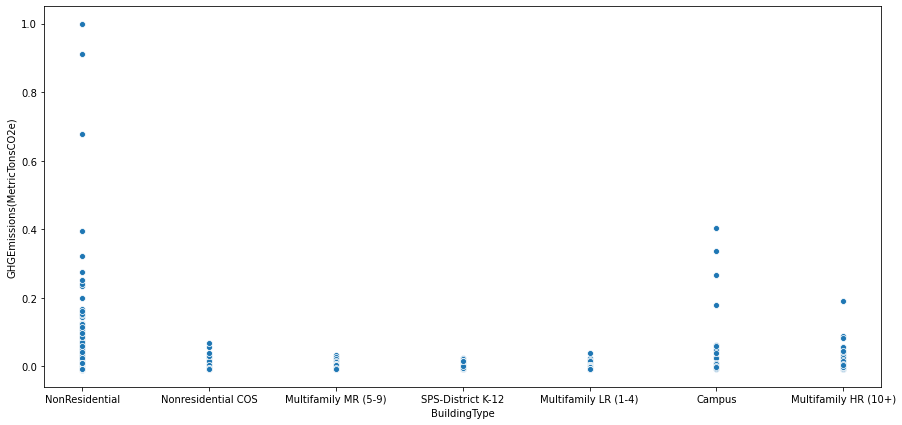

In [43]:
#simple feature scaling(range 0-1)
#xnew=xold/xmax
#seaborn Scatterplot
plt.figure(figsize=(15,7))
df["GHGEmissions(MetricTonsCO2e)"]=(df["GHGEmissions(MetricTonsCO2e)"])/df["GHGEmissions(MetricTonsCO2e)"].max()
sns.scatterplot(x=df['BuildingType'], y=df["GHGEmissions(MetricTonsCO2e)"])

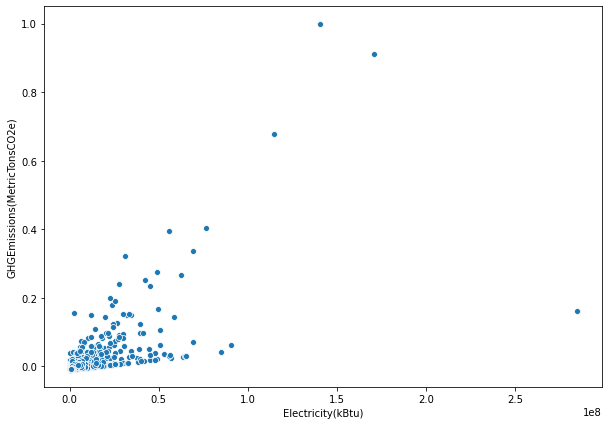

In [97]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Electricity(kBtu)'], y=df["GHGEmissions(MetricTonsCO2e)"])

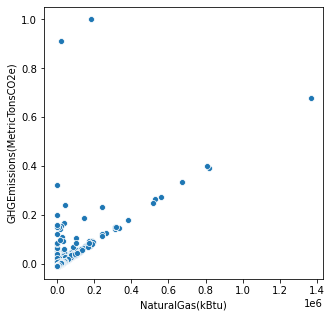

In [110]:
#plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['NaturalGas(therms)'], y=df["GHGEmissions(MetricTonsCO2e)"])
plt.xlabel("NaturalGas(kBtu)")
plt.ylabel("GHGEmissions(MetricTonsCO2e)")
plt.show()

In [ ]:
sns.scatterplot(x=df['Electricity(kBtu)'], y=df["GHGEmissions(MetricTonsCO2e)"])

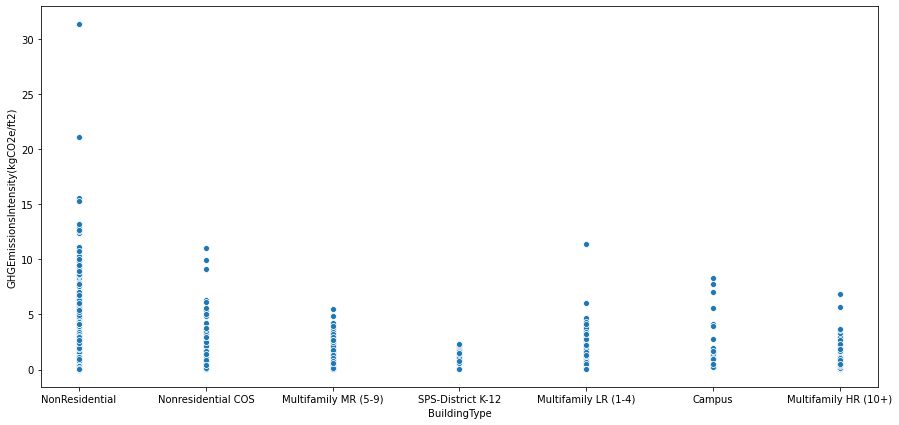

In [38]:
#seaborn Scatterplot
#(z-score )normalization is applied on "TotalGHGEmissions"
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['BuildingType'], y=df['GHGEmissionsIntensity(kgCO2e/ft2)'])


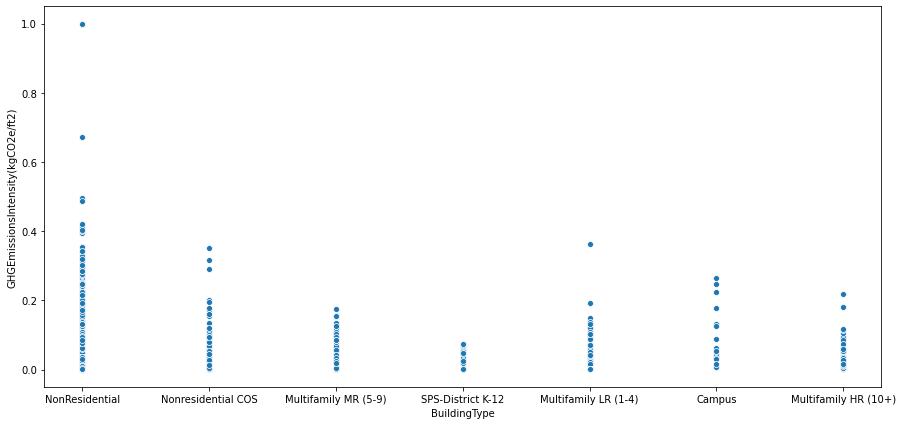

In [39]:
#seaborn Scatterplot
#simple feature scaling(range 0-1)
#xnew=xold/xmax
plt.figure(figsize=(15,7))
df["GHGEmissionsIntensity(kgCO2e/ft2)"]=(df["GHGEmissionsIntensity(kgCO2e/ft2)"])/df["GHGEmissionsIntensity(kgCO2e/ft2)"].max()
sns.scatterplot(x=df['BuildingType'], y=df['GHGEmissionsIntensity(kgCO2e/ft2)'])

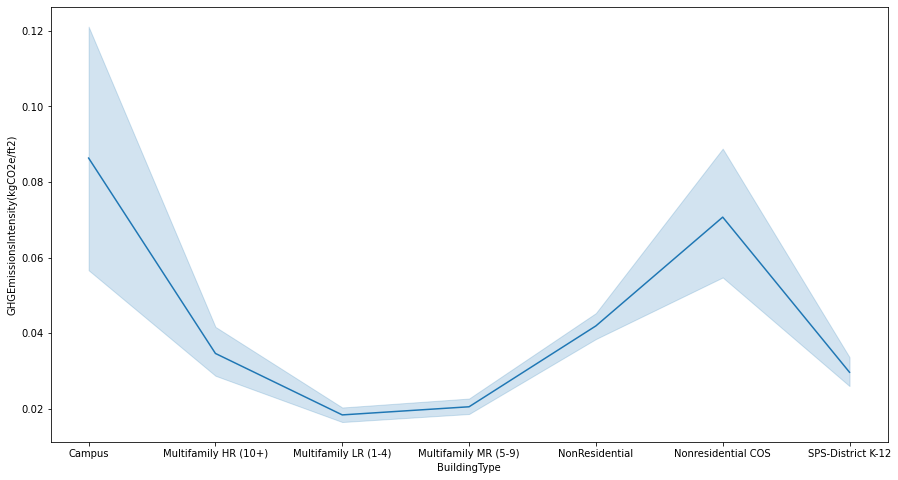

In [65]:
#line plot 
df["GHGEmissionsIntensity(kgCO2e/ft2)"]=(df["GHGEmissionsIntensity(kgCO2e/ft2)"])/df["GHGEmissionsIntensity(kgCO2e/ft2)"].max()
plt.figure(figsize=(15,8))
sns.lineplot(x='BuildingType',y='GHGEmissionsIntensity(kgCO2e/ft2)', data=df )

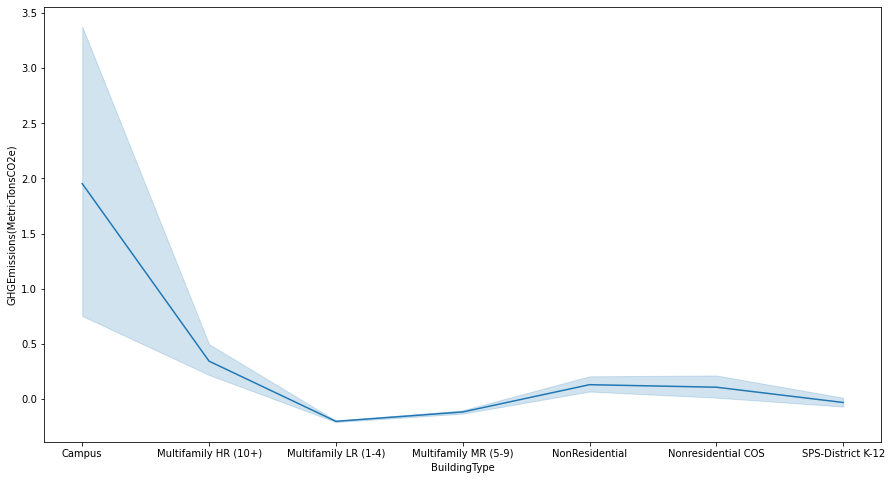

In [64]:
plt.figure(figsize=(15,8))

df["GHGEmissions(MetricTonsCO2e)"]=(df["GHGEmissions(MetricTonsCO2e)"]-df["GHGEmissions(MetricTonsCO2e)"].mean())/df["GHGEmissions(MetricTonsCO2e)"].std()
#sns.scatterplot(x=df['BuildingType'], y=df['GHGEmissions(MetricTonsCO2e)'])
#NonResidentials buildings are higher in GHGEmissions(MetricTonsCO2e)
sns.lineplot(x='BuildingType',y='GHGEmissions(MetricTonsCO2e)', data=df )

In [ ]:
#Campus have higher GHGEmissions(MetricTonsCO2e)

Text(0.5, 0, 'BuildingType')

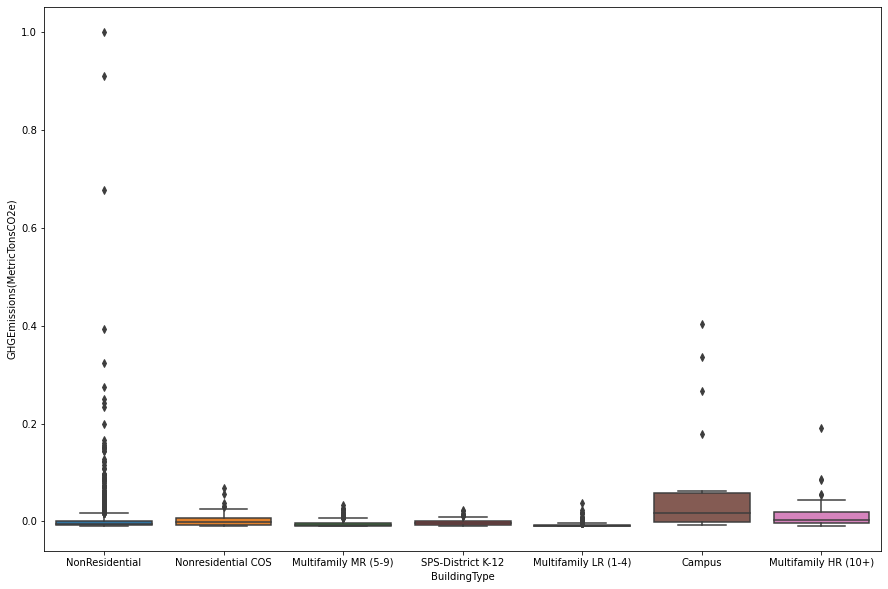

In [66]:
#Box plot
plt.figure(figsize=(15,10))
#df["GHGEmissions(MetricTonsCO2e)"]=(df["GHGEmissions(MetricTonsCO2e)"]-df["GHGEmissions(MetricTonsCO2e)"].mean())/df["GHGEmissions(MetricTonsCO2e)"].std()
df["GHGEmissions(MetricTonsCO2e)"]=(df["GHGEmissions(MetricTonsCO2e)"])/df["GHGEmissions(MetricTonsCO2e)"].max()
sns.boxplot(y ='GHGEmissions(MetricTonsCO2e)',data= df, x= 'BuildingType')
plt.xlabel('BuildingType')
## Multifamily MR (5-9),SPS-District K-12 , Multifamily LR (1-4), have almost same mean

Text(0.5, 0, 'BuildingType')

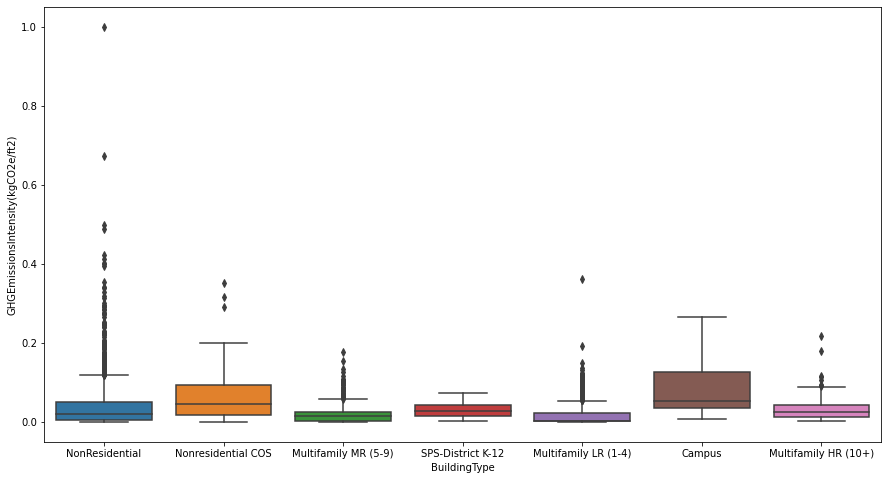

In [67]:
#line plot 
df["GHGEmissionsIntensity(kgCO2e/ft2)"]=(df["GHGEmissionsIntensity(kgCO2e/ft2)"])/df["GHGEmissionsIntensity(kgCO2e/ft2)"].max()
plt.figure(figsize=(15,8))
sns.boxplot(x='BuildingType',y='GHGEmissionsIntensity(kgCO2e/ft2)', data=df )
plt.xlabel('BuildingType')

In [ ]:
# NonResidential and Multifamily MR have same mean value
#Multifamily Lr and multifamily Hr have same mean distribution

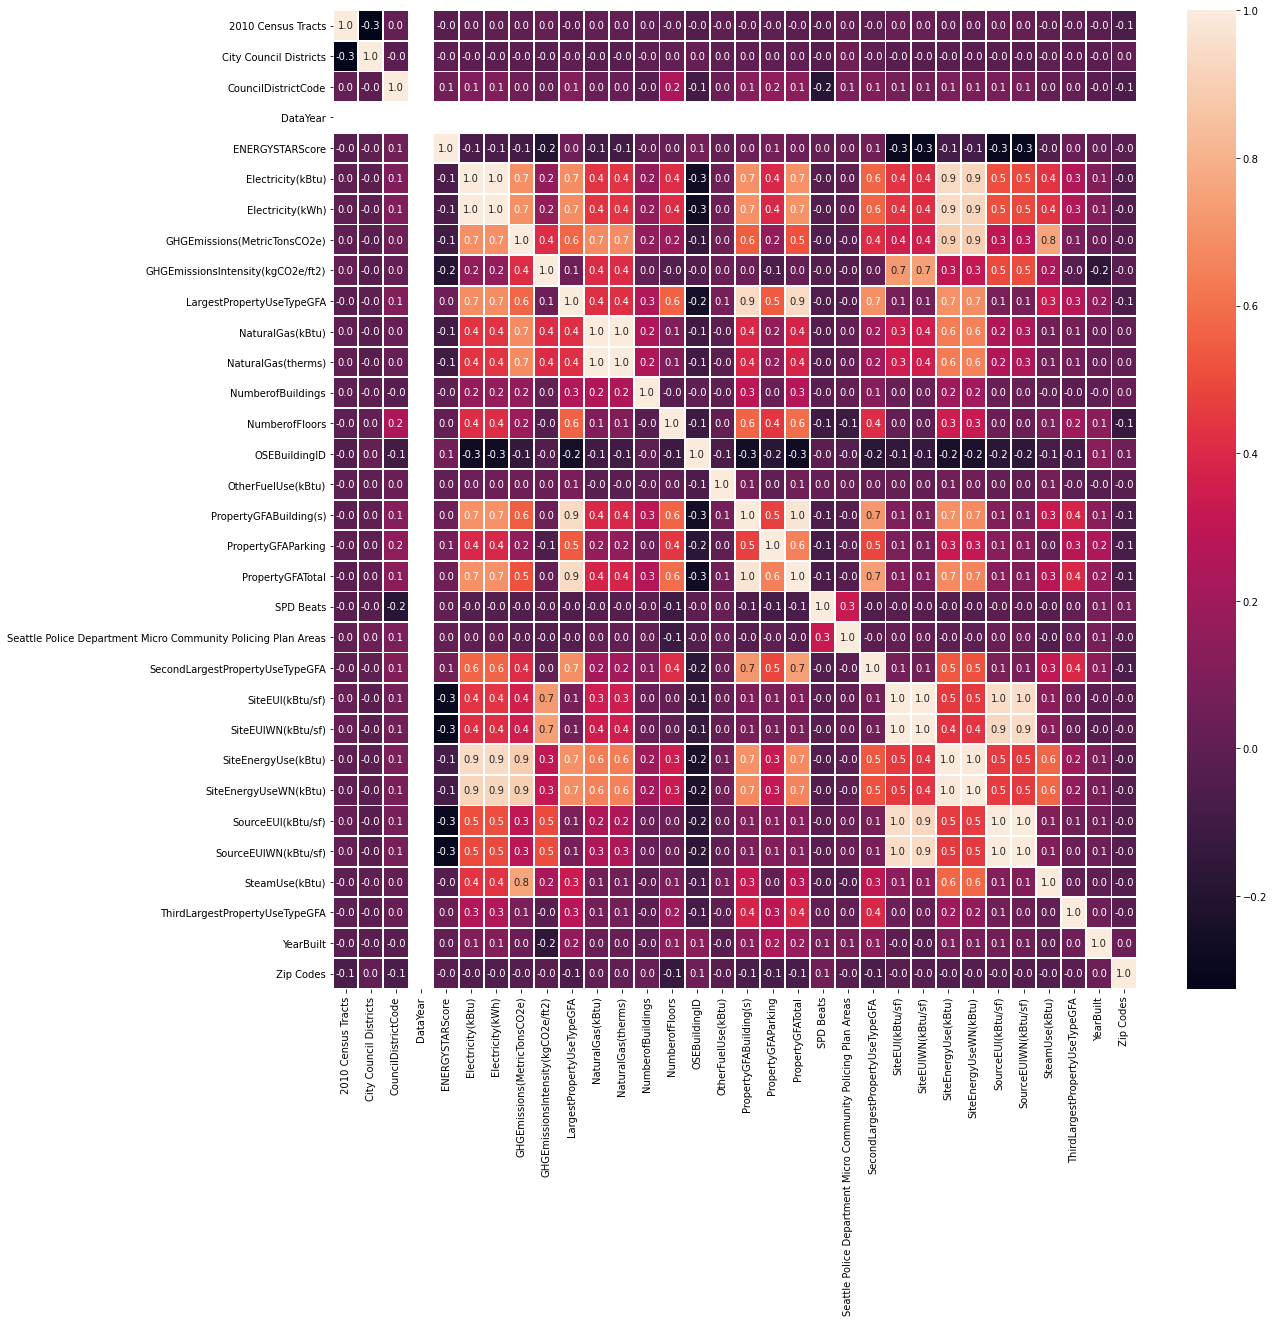

In [70]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [76]:
drop_list=["DataYear","2010 Census Tracts","City Council Districts","Electricity(kWh)","NaturalGas(therms)","PropertyGFABuilding(s)",
          "SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","SourceEUI(kBtu/sf)","LargestPropertyUseTypeGFA","Zip Codes","SecondLargestPropertyUseTypeGFA"]

In [77]:
#df_2015_x=df_2015.drop(drop_list,axis=1)
df_1=df.drop(drop_list,axis=1)

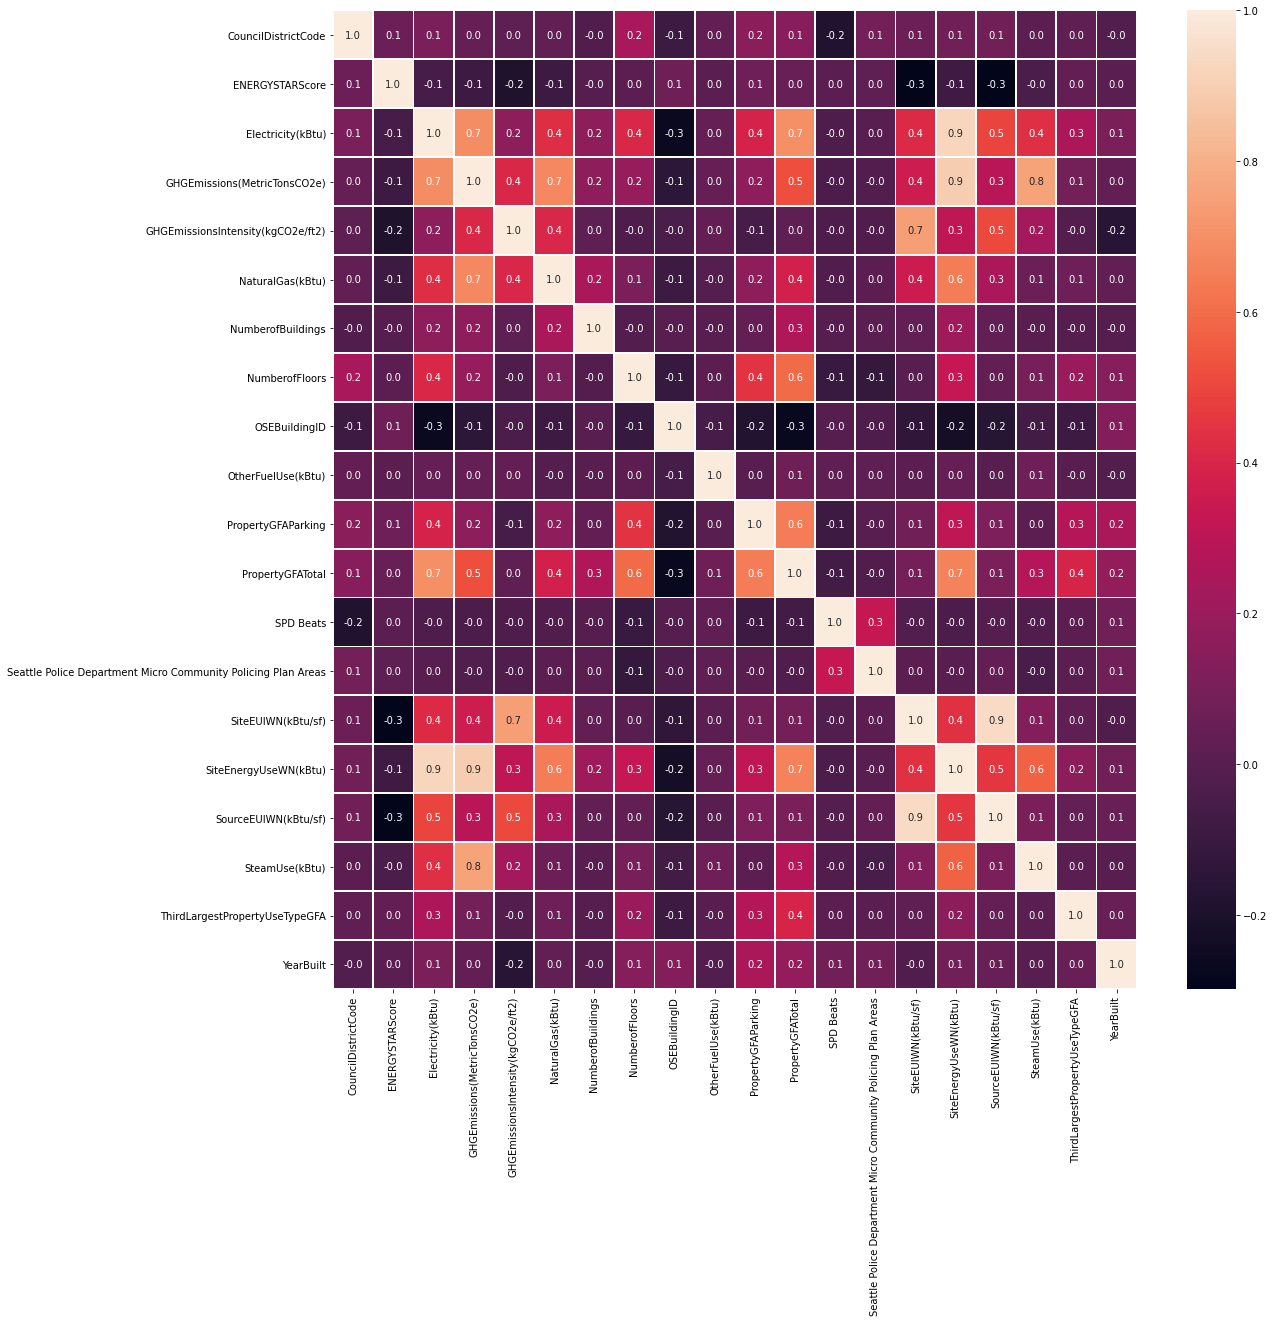

In [78]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_1.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [79]:
df_1.head()

,BuildingType,ComplianceStatus,CouncilDistrictCode,DefaultData,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ListOfAllPropertyUseTypes,Location,...,PropertyName,SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,SiteEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseTypeGFA,YearBuilt
0,NonResidential,Compliant,7,No,65.0,3686160.0,0.011894,0.084130,Hotel,"{'latitude': '47.61219025', 'longitude': '-122...",...,MAYFLOWER PARK HOTEL,31.0,14.0,80.3,7097539.0,175.1,2023032.0,659000030,10755.708929,1927
1,NonResidential,Compliant,7,No,51.0,3905411.0,0.013096,0.075844,"Hotel, Parking, Restaurant","{'latitude': '47.61310583', 'longitude': '-122...",...,PARAMOUNT HOTEL,31.0,14.0,99.0,8765788.0,195.2,0.0,659000220,4622.000000,1996
2,NonResidential,Compliant,7,Yes,18.0,49762435.0,0.166574,0.061185,"Hotel, Parking, Swimming Pool","{'latitude': '47.61334897', 'longitude': '-122...",...,WESTIN HOTEL,31.0,56.0,99.7,75506272.0,246.5,19660404.0,659000475,0.000000,1969
3,NonResidential,Compliant,7,No,1.0,2769023.0,0.155892,1.000000,Hotel,"{'latitude': '47.61421585', 'longitude': '-122...",...,HOTEL MAX,31.0,56.0,462.5,28363444.0,643.2,23458518.0,659000640,10755.708929,1926
4,NonResidential,Compliant,7,No,67.0,6066245.0,0.033940,0.128107,"Hotel, Parking, Swimming Pool","{'latitude': '47.6137544', 'longitude': '-122....",...,WARWICK SEATTLE HOTEL,31.0,56.0,122.1,15078243.0,227.1,0.0,659000970,0.000000,1980


In [80]:
##To select  numeric types and object types
df_1_num=df_1.select_dtypes(np.number)
df_1_obj=df_1.select_dtypes('object')

In [81]:
df_1_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   CouncilDistrictCode                                            3340 non-null   int64  
 1   ENERGYSTARScore                                                3340 non-null   float64
 2   Electricity(kBtu)                                              3340 non-null   float64
 3   GHGEmissions(MetricTonsCO2e)                                   3340 non-null   float64
 4   GHGEmissionsIntensity(kgCO2e/ft2)                              3340 non-null   float64
 5   NaturalGas(kBtu)                                               3340 non-null   float64
 6   NumberofBuildings                                              3340 non-null   int64  
 7   NumberofFloors                                              